In [13]:
import pandas as pd
import numpy as np

In [16]:
import databricks.koalas as ks

In [17]:
from pyspark.sql import SparkSession

In [15]:
 pip install koalas

     |████████████████████████████████| 668 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
scores = {"name":['Ray','Japhy','Zosa'],
          "city":['San Francisco','San Francisco','Denver'],
          "score":[75,92,94]
         }

In [3]:
df=pd.DataFrame(scores)
df

,name,city,score
0,Ray,San Francisco,75
1,Japhy,San Francisco,92
2,Zosa,Denver,94


In [5]:
planets=pd.read_csv('./linkedin/Ex_Files_Adv_Pandas/Exercise Files/planets.csv')

In [6]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [7]:
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
planets['year_dt']=pd.to_datetime(planets['year'],format='%Y')
planets['year_dt']

0      2006-01-01
1      2008-01-01
2      2011-01-01
3      2007-01-01
4      2009-01-01
          ...    
1030   2006-01-01
1031   2007-01-01
1032   2007-01-01
1033   2008-01-01
1034   2008-01-01
Name: year_dt, Length: 1035, dtype: datetime64[ns]

In [9]:
names = pd.Series(['Pomeray, CODY ',' Wagner; Jarry','smith, Ray'])

In [10]:
names

0    Pomeray, CODY 
1     Wagner; Jarry
2        smith, Ray
dtype: object

In [11]:
names=names.str.replace(';', ',')

In [12]:
names

0    Pomeray, CODY 
1     Wagner, Jarry
2        smith, Ray
dtype: object

In [13]:
names=names.str.split(',')
names

0    [Pomeray,  CODY ]
1    [ Wagner,  Jarry]
2        [smith,  Ray]
dtype: object

In [14]:
names=pd.Series([i[::-1] for i in names])

In [15]:
names

0    [ CODY , Pomeray]
1    [ Jarry,  Wagner]
2        [ Ray, smith]
dtype: object

In [16]:
names=[' '.join(i) for i in names]
names

[' CODY  Pomeray', ' Jarry  Wagner', ' Ray smith']

In [25]:
daterange=pd.period_range('1/1/2020', freq='30d',periods=4) ## Separated by 30 days
daterange

PeriodIndex(['2020-01-01', '2020-01-31', '2020-03-01', '2020-03-31'], dtype='period[30D]', freq='30D')

In [26]:
date_df=pd.DataFrame(data=daterange,columns=['sample date'])
date_df

,sample date
0,2020-01-01
1,2020-01-31
2,2020-03-01
3,2020-03-31


# Find First day of month

In [27]:
date_df['first_of_month']=date_df['sample date'].values.astype('datetime64[M]')
date_df

,sample date,first_of_month
0,2020-01-01,2020-01-01
1,2020-01-31,2020-01-01
2,2020-03-01,2020-03-01
3,2020-03-31,2020-03-01


In [28]:
date_df['date difference']=date_df['sample date'].diff(periods=1)
date_df

,sample date,first_of_month,date difference
0,2020-01-01,2020-01-01,NaT
1,2020-01-31,2020-01-01,<30 * Days>
2,2020-03-01,2020-03-01,<30 * Days>
3,2020-03-31,2020-03-01,<30 * Days>


In [29]:
date_df['sample date']=date_df['sample date'].dt.to_timestamp()
date_df

,sample date,first_of_month,date difference
0,2020-01-01,2020-01-01,NaT
1,2020-01-31,2020-01-01,<30 * Days>
2,2020-03-01,2020-03-01,<30 * Days>
3,2020-03-31,2020-03-01,<30 * Days>


# Date Substraction

In [31]:
date_df['sample date'] -date_df['date difference']

/home/dtewani/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


0          NaT
1   2020-01-01
2   2020-01-31
3   2020-03-01
dtype: datetime64[ns]

In [ ]:
date_df['sample date'] -date_df['first_of_month']

In [32]:
date_df['sample date'] -pd.Timedelta('30 d')

0   2019-12-02
1   2020-01-01
2   2020-01-31
3   2020-03-01
Name: sample date, dtype: datetime64[ns]

In [33]:
date_df['sample date'].dt.day_name()

0    Wednesday
1       Friday
2       Sunday
3      Tuesday
Name: sample date, dtype: object

In [34]:
temps = pd.DataFrame({"sequence":[1,2,3,4,5],
          "measurement_type":['actual','actual','actual',None,'estimated'],
          "temperature_f":[67.24,84.56,91.61,None,49.64]
         })
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,NaN
4,5,estimated,49.64


In [35]:
temps.isna()

,sequence,measurement_type,temperature_f
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False


In [36]:
temps['temperature_f'].cumsum() ## Cumsum skips nulls

0     67.24
1    151.80
2    243.41
3       NaN
4    293.05
Name: temperature_f, dtype: float64

In [37]:
temps['temperature_f'].cumsum(skipna=False)  ## place all values to null, once a null value is found

0     67.24
1    151.80
2    243.41
3       NaN
4       NaN
Name: temperature_f, dtype: float64

In [40]:
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,NaN
4,5,estimated,49.64


In [39]:
temps.groupby(by=['measurement_type']).max()

,sequence,temperature_f
measurement_type,,
actual,3,91.61
estimated,5,49.64


In [ ]:
temps.groupby(by=['measurement_type']).max()

In [42]:
temps.groupby(by=['measurement_type'],dropna=False).sum()

,sequence,temperature_f
measurement_type,,
actual,6,243.41
estimated,5,49.64
NaN,4,0.00


In [43]:
temps.dropna(axis=0)  ## Drop all rows where row contains null

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
4,5,estimated,49.64


In [44]:
temps.dropna(axis=1)  ## Drop all columns where row contains null

,sequence
0,1
1,2
2,3
3,4
4,5


In [45]:
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,NaN
4,5,estimated,49.64


In [46]:
temps.fillna(0)

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,0,0.00
4,5,estimated,49.64


In [47]:
temps.fillna(method='pad')  ## Carry over values from previous rows

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,actual,91.61
4,5,estimated,49.64


In [48]:
temps.interpolate()  ## Places values which is half way between 2 values (defalt behavior of intpolate)

,sequence,measurement_type,temperature_f
0,1,actual,67.240
1,2,actual,84.560
2,3,actual,91.610
3,4,None,70.625
4,5,estimated,49.640


In [49]:
df = pd.DataFrame({"Region":['North','West','East','South','North','West','East','South'],
          "Team":['One','One','One','One','Two','Two','Two','Two'],
          "Squad":['A','B','C','D','E','F','G','H'],
          "Revenue":[7500,5500,2750,6400,2300,3750,1900,575],
            "Cost":[5200,5100,4400,5300,1250,1300,2100,50]})
df

,Region,Team,Squad,Revenue,Cost
0,North,One,A,7500,5200
1,West,One,B,5500,5100
2,East,One,C,2750,4400
3,South,One,D,6400,5300
4,North,Two,E,2300,1250
5,West,Two,F,3750,1300
6,East,Two,G,1900,2100
7,South,Two,H,575,50


In [50]:
df['Profit'] = df.apply(lambda x: 'Profit' if x['Revenue']>x['Cost'] else 'Loss',axis=1)
df

,Region,Team,Squad,Revenue,Cost,Profit
0,North,One,A,7500,5200,Profit
1,West,One,B,5500,5100,Profit
2,East,One,C,2750,4400,Loss
3,South,One,D,6400,5300,Profit
4,North,Two,E,2300,1250,Profit
5,West,Two,F,3750,1300,Profit
6,East,Two,G,1900,2100,Loss
7,South,Two,H,575,50,Profit


In [51]:
team_map = {"One":"Red","Two":"Blue"}

In [53]:
df['Team Color']=df['Team'].map(team_map)
df

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,North,One,A,7500,5200,Profit,Red
1,West,One,B,5500,5100,Profit,Red
2,East,One,C,2750,4400,Loss,Red
3,South,One,D,6400,5300,Profit,Red
4,North,Two,E,2300,1250,Profit,Blue
5,West,Two,F,3750,1300,Profit,Blue
6,East,Two,G,1900,2100,Loss,Blue
7,South,Two,H,575,50,Profit,Blue


In [54]:
df.applymap(lambda x : len(str(x)))  ## Apply function every object in dataframe

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,5,3,1,4,4,6,3
1,4,3,1,4,4,6,3
2,4,3,1,4,4,4,3
3,5,3,1,4,4,6,3
4,5,3,1,4,4,6,4
5,4,3,1,4,4,6,4
6,4,3,1,4,4,4,4
7,5,3,1,3,2,6,4


In [55]:
new_col = []

for i in range(0,len(df)):
  rev = df['Revenue'][i]/df[df['Region']==df.loc[i,'Region']]['Revenue'].sum()
  new_col.append(rev)

In [56]:
df['Revenue Share of Region'] = new_col
df.sort_values(by='Region')

,Region,Team,Squad,Revenue,Cost,Profit,Team Color,Revenue Share of Region
2,East,One,C,2750,4400,Loss,Red,0.591398
6,East,Two,G,1900,2100,Loss,Blue,0.408602
0,North,One,A,7500,5200,Profit,Red,0.765306
4,North,Two,E,2300,1250,Profit,Blue,0.234694
3,South,One,D,6400,5300,Profit,Red,0.917563
7,South,Two,H,575,50,Profit,Blue,0.082437
1,West,One,B,5500,5100,Profit,Red,0.594595
5,West,Two,F,3750,1300,Profit,Blue,0.405405


In [60]:
iris=pd.read_csv('./linkedin/Ex_Files_Adv_Pandas/Exercise Files/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [61]:
iris.groupby(['species']).max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [62]:
df=iris.groupby(['species']).agg({'sepal_length':['mean', 'min', 'max'], 'sepal_width' : 'count'})
df

sepal_length           sepal_width
                   mean  min  max       count
species                                      
setosa            5.006  4.3  5.8          50
versicolor        5.936  4.9  7.0          50
virginica         6.588  4.9  7.9          50

In [63]:
df.columns=['_'.join(col).strip() for col in df.columns.values]
df.reset_index()
df

,sepal_length_mean,sepal_length_min,sepal_length_max,sepal_width_count
species,,,,
setosa,5.006,4.3,5.8,50
versicolor,5.936,4.9,7.0,50
virginica,6.588,4.9,7.9,50


In [64]:
groupings=iris.groupby(['species'])
groupings

In [65]:
groupings.get_group('setosa')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [66]:
groupings.max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [67]:
groupings.apply(lambda x: x.max())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [68]:
groupings.filter(lambda x : x['petal_length'].max()<5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [69]:
df = pd.DataFrame({"Region":['North','West','East','South','North','West','East','South'],
          "Team":['One','One','One','One','Two','Two','Two','Two'],
          "Revenue":[7500,5500,2750,6400,2300,3750,1900,575],
            "Cost":[5200,5100,4400,5300,1250,1300,2100,50]})
df

,Region,Team,Revenue,Cost
0,North,One,7500,5200
1,West,One,5500,5100
2,East,One,2750,4400
3,South,One,6400,5300
4,North,Two,2300,1250
5,West,Two,3750,1300
6,East,Two,1900,2100
7,South,Two,575,50


In [70]:
df.pivot(index='Region', columns='Team', values='Revenue')

Team,One,Two
Region,,
East,2750,1900
North,7500,2300
South,6400,575
West,5500,3750


In [71]:
df2=df.set_index(['Region', 'Team'])
df2

,,Revenue,Cost
Region,Team,,
North,One,7500,5200
West,One,5500,5100
East,One,2750,4400
South,One,6400,5300
North,Two,2300,1250
West,Two,3750,1300
East,Two,1900,2100
South,Two,575,50


In [72]:
stacked=pd.DataFrame(df2.stack())
stacked

0
Region Team              
North  One  Revenue  7500
            Cost     5200
West   One  Revenue  5500
            Cost     5100
East   One  Revenue  2750
            Cost     4400
South  One  Revenue  6400
            Cost     5300
North  Two  Revenue  2300
            Cost     1250
West   Two  Revenue  3750
            Cost     1300
East   Two  Revenue  1900
            Cost     2100
South  Two  Revenue   575
            Cost       50

In [73]:
stacked.unstack()

0      
            Revenue  Cost
Region Team              
East   One     2750  4400
       Two     1900  2100
North  One     7500  5200
       Two     2300  1250
South  One     6400  5300
       Two      575    50
West   One     5500  5100
       Two     3750  1300

In [74]:
stacked.unstack('Region')

0                  
Region        East North South  West
Team                                
One  Revenue  2750  7500  6400  5500
     Cost     4400  5200  5300  5100
Two  Revenue  1900  2300   575  3750
     Cost     2100  1250    50  1300

In [75]:
df.melt(id_vars=['Region','Team'],var_name='value type')

,Region,Team,value type,value
0,North,One,Revenue,7500
1,West,One,Revenue,5500
2,East,One,Revenue,2750
3,South,One,Revenue,6400
4,North,Two,Revenue,2300
5,West,Two,Revenue,3750
6,East,Two,Revenue,1900
7,South,Two,Revenue,575
8,North,One,Cost,5200
9,West,One,Cost,5100


In [76]:
df.pivot_table(index='Team', values='Revenue') ## By Default its mean/avg

,Revenue
Team,
One,5537.50
Two,2131.25


In [77]:
df.pivot_table(index='Team',columns='Region', values='Revenue')

Region,East,North,South,West
Team,,,,
One,2750,7500,6400,5500
Two,1900,2300,575,3750


In [78]:
df1 = pd.DataFrame({'letter': ['A', 'B', 'C', 'D'],
                    'number': [1, 2, 3, 4]})
df2 = pd.DataFrame({'letter': ['C', 'D', 'E', 'F'],
                    'number': [3, 4, 5, 6]})

In [79]:
df = pd.DataFrame({"Species":['Chinook','Chum','Coho','Steelhead','Bull Trout'],
             "Population":['Skokomish','Lower Skokomish','Skokomish','Skokomish','SF Skokomish'],
             "Count":[1208,2396,3220,6245,8216]})
df

,Species,Population,Count
0,Chinook,Skokomish,1208
1,Chum,Lower Skokomish,2396
2,Coho,Skokomish,3220
3,Steelhead,Skokomish,6245
4,Bull Trout,SF Skokomish,8216


In [80]:
import numpy as np
bins = [0, 2000, 4000, 6000, 8000, np.inf]
labels = ['Low Return', 'Below Avg Return', 'Avg Return', 'Above Avg Return', 'High Return']

In [81]:
df['Count Category']=pd.cut(df['Count'],bins, labels=labels)
df

,Species,Population,Count,Count Category
0,Chinook,Skokomish,1208,Low Return
1,Chum,Lower Skokomish,2396,Below Avg Return
2,Coho,Skokomish,3220,Below Avg Return
3,Steelhead,Skokomish,6245,Above Avg Return
4,Bull Trout,SF Skokomish,8216,High Return


In [82]:
fed_status ={"Chinook":"Threatened",
"Chum":"Not Warranted",
"Coho":"Not Warranted",
"Steelhead":"Threatened"}

In [83]:
df['Federal Status'] = df['Species'].map(fed_status)
df

,Species,Population,Count,Count Category,Federal Status
0,Chinook,Skokomish,1208,Low Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
3,Steelhead,Skokomish,6245,Above Avg Return,Threatened
4,Bull Trout,SF Skokomish,8216,High Return,NaN


In [84]:
df['Count Category']=pd.Categorical(df['Count Category'], ordered=True, categories=labels)
df

,Species,Population,Count,Count Category,Federal Status
0,Chinook,Skokomish,1208,Low Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
3,Steelhead,Skokomish,6245,Above Avg Return,Threatened
4,Bull Trout,SF Skokomish,8216,High Return,NaN


In [85]:
df['Count Category']

0          Low Return
1    Below Avg Return
2    Below Avg Return
3    Above Avg Return
4         High Return
Name: Count Category, dtype: category
Categories (5, object): ['Low Return' < 'Below Avg Return' < 'Avg Return' < 'Above Avg Return' < 'High Return']

In [87]:
pd.get_dummies(df['Count Category'])

,Low Return,Below Avg Return,Avg Return,Above Avg Return,High Return
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [92]:
import numpy as np
%matplotlib inline
daterange = pd.period_range('1/1/1950', freq='1d', periods=50)
date_df = pd.DataFrame(data=daterange,columns=['day'])
date_df['value1'] = np.random.randint(45,65,size=(len(date_df)))
date_df['value2'] = np.random.randint(25,35,size=(len(date_df)))
date_df.head(3)

,day,value1,value2
0,1950-01-01,55,32
1,1950-01-02,51,29
2,1950-01-03,57,25


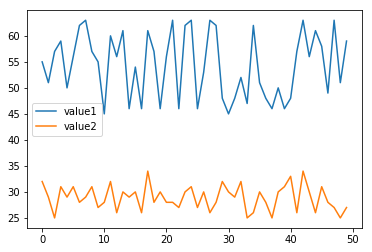

In [95]:
ax=date_df.plot();

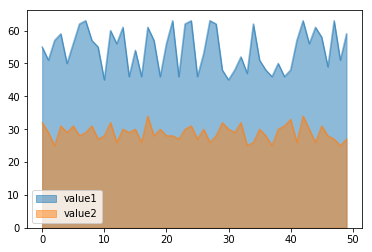

In [97]:
date_df.plot.area(stacked=False);

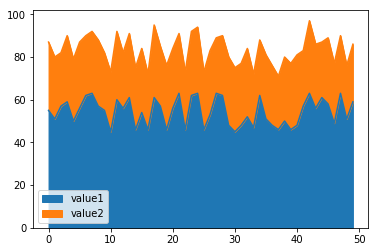

In [98]:
date_df.plot.area(stacked=True);

In [100]:
iris=pd.read_csv('./linkedin/Ex_Files_Adv_Pandas/Exercise Files/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


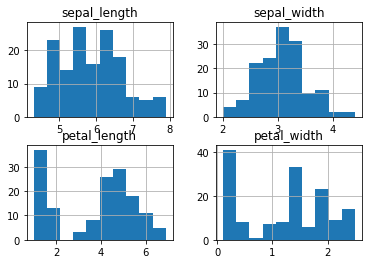

In [101]:
iris.hist();

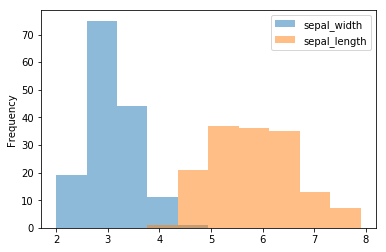

In [102]:
iris[['sepal_width','sepal_length',]].plot.hist(alpha=0.5);

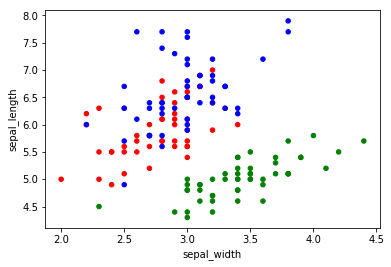

In [103]:
colors = {"versicolor":"red","setosa":"green","virginica":"blue"}
iris['colors'] = iris['species'].map(colors)
iris.plot.scatter(x='sepal_width', y='sepal_length', color=iris['colors']);

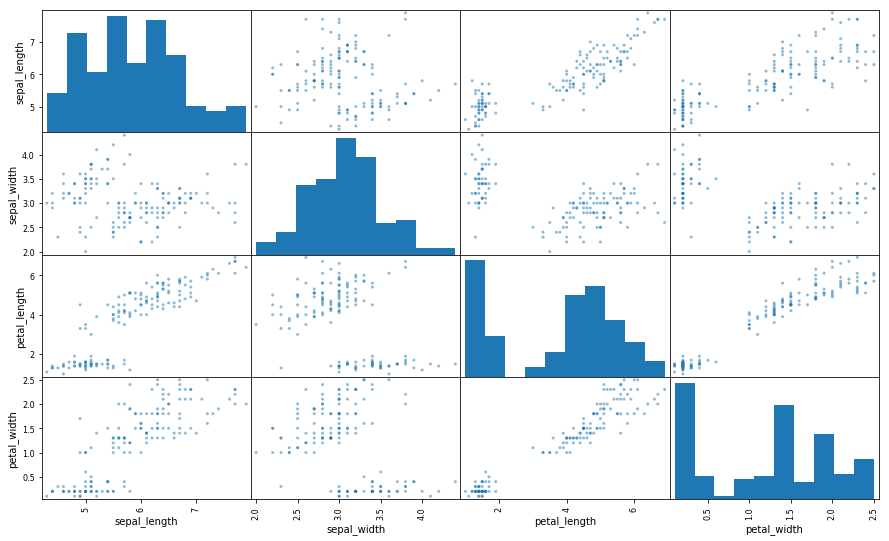

In [104]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris,figsize=(15, 9),);

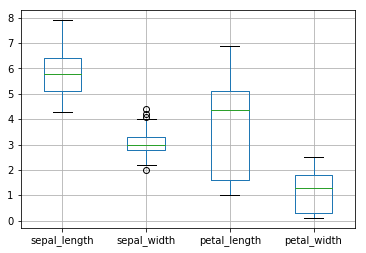

In [105]:
iris.boxplot();

In [106]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [108]:
iris.corr().style.background_gradient()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [110]:
from pandas_profiling import ProfileReport

In [111]:
profile=ProfileReport(iris, title='Iris Data profile')

In [112]:
profile

In [6]:
import geopandas

In [4]:
peaks = pd.DataFrame(
    {'Peak Name': ['Green Mtn.', 'So. Boulder Peak', 'Bear Peak', 'Flagstaff Mtn.', 'Mt. Sanitas'],
     'Latitude': [39.9821, 39.9539, 39.9603, 40.0017, 40.0360968],
     'Longitude': [-105.3016, -105.2992, -105.2952, -105.3075, -105.3061024]})

In [7]:
gdf=geopandas.GeoDataFrame(peaks, geometry=geopandas.points_from_xy(peaks.Longitude, peaks.Latitude))
gdf

,Peak Name,Latitude,Longitude,geometry
0,Green Mtn.,39.982100,-105.301600,POINT (-105.30160 39.98210)
1,So. Boulder Peak,39.953900,-105.299200,POINT (-105.29920 39.95390)
2,Bear Peak,39.960300,-105.295200,POINT (-105.29520 39.96030)
3,Flagstaff Mtn.,40.001700,-105.307500,POINT (-105.30750 40.00170)
4,Mt. Sanitas,40.036097,-105.306102,POINT (-105.30610 40.03610)


In [2]:
import plotly.express as px


In [8]:
px.set_mapbox_access_token(token)
gdf['size'] = 65

fig = px.scatter_mapbox(gdf,
                        lat=gdf.geometry.y,
                        lon=gdf.geometry.x,
                        color="Peak Name",
                        hover_name="Peak Name",
                        mapbox_style='outdoors',
                        size='size',
                        zoom=10)

fig.show()

NameError: name 'token' is not defined

In [9]:
import plotly.express as px
px.set_mapbox_access_token(token)
gdf['size'] = 65

fig = px.scatter_mapbox(gdf,
                        lat=gdf.geometry.y,
                        lon=gdf.geometry.x,
                        color="Peak Name",
                        hover_name="Peak Name",
                        mapbox_style='outdoors',
                        size='size',
                        zoom=10)

fig.show()

NameError: name 'token' is not defined

In [10]:
import dask.dataframe as dd

In [12]:
df=dd.read_csv('./linkedin/Ex_Files_Adv_Pandas/Exercise Files/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
pdf=pd.DataFrame(np.random.rand(6,4), columns=list('ABCD'))
pdf.head()

,A,B,C,D
0,0.972071,0.373645,0.191089,0.422266
1,0.981694,0.861628,0.352783,0.237468
2,0.194319,0.358218,0.359431,0.803405
3,0.376894,0.086493,0.237050,0.067591
4,0.680717,0.080595,0.006542,0.762808


In [19]:
kdf=ks.from_pandas(pdf)
kdf.head()

,A,B,C,D
0,0.972071,0.373645,0.191089,0.422266
1,0.981694,0.861628,0.352783,0.237468
2,0.194319,0.358218,0.359431,0.803405
3,0.376894,0.086493,0.237050,0.067591
4,0.680717,0.080595,0.006542,0.762808
